## Image Augmentation

Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.

**Important**: Image data augmentation is typically only applied to the training dataset, and not to the validation or test dataset. 

**Important**: Always reshape the dataset in the following order: [samples][width][height][channels]

### **The following are some of the ways we can augment data**:
1. Image shifts via the width_shift_range and height_shift_range arguments.
2.Image flips via the horizontal_flip and vertical_flip arguments.
3. Image rotations via the rotation_range argument
4. Image brightness via the brightness_range argument.
5. Image zoom via the zoom_range argument.

### **General Flow**:
1. Create instance of ImageDataGenerator Class
2. Create iterator using flow method
3. Define the model 
4. use the fit_generator with iterator and steps_per_epochs as argument. 

### **References**:
1. https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/
2. https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/
3. https://machinelearningmastery.com/image-augmentation-deep-learning-keras/


In [0]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras.datasets import mnist


In [0]:
img = load_img('bird.jpg')
data = img_to_array(img)
samples = expand_dims(data,0)

### horizontal shift

In [0]:
datagen = ImageDataGenerator(width_shift_range=[-200,200])
it = datagen.flow(samples, batch_size=1)

for i in range(9):
	pyplot.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	pyplot.imshow(image)
pyplot.show()

### Vertical shift

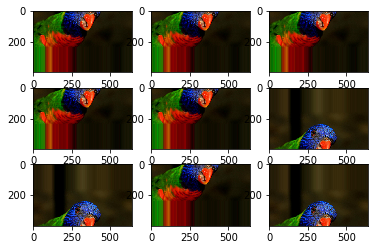

In [21]:
datagen = ImageDataGenerator(height_shift_range=[-0.4,0.4], fill_mode=)
it = datagen.flow(samples, batch_size=1)

for i in range(9):
  pyplot.subplot(330 + 1 + i)
  batch = it.next()
  image = batch[0].astype('uint8')
  pyplot.imshow(image)
pyplot.show()

**Note**: 
There are four types of fill_mode to be specified in the datagen constructor. 

1. constant: fill with black color
2. wrap: wrap the image
3. Reflect: create image reflection across all borders
4. Nearest: fill the new pixels with the nearest pixel 
  [SEE EXAMPLE ABOVE] [DEFAULT]

### Horizontal Flip

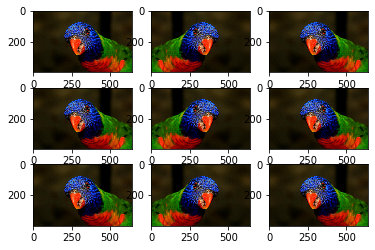

In [22]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)

for i in range(9):
	pyplot.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	pyplot.imshow(image)
pyplot.show()

### Vertical Flip

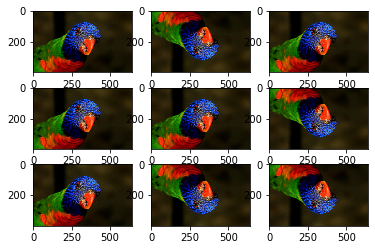

In [23]:
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)

for i in range(9):
	pyplot.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	pyplot.imshow(image)
pyplot.show()

### Random Rotation 

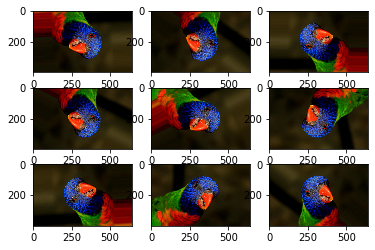

In [24]:
datagen = ImageDataGenerator(rotation_range=180)
it = datagen.flow(samples, batch_size=1)

for i in range(9):
	pyplot.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	pyplot.imshow(image)
pyplot.show()

### Random Brightness

Value less than 1 darkens the image and greater lightens the image.

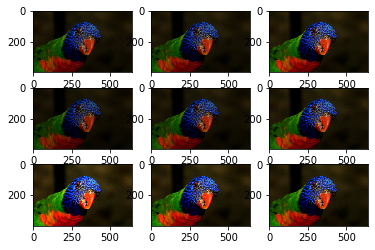

In [25]:
datagen = ImageDataGenerator(brightness_range=[0.2,1.2])
it = datagen.flow(samples, batch_size=1)

for i in range(9):
	pyplot.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	pyplot.imshow(image)
pyplot.show()

### Random Zoom

Value less than 1 means zoom in and greater than 1 means zoom out.

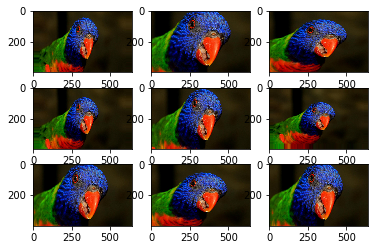

In [26]:
datagen = ImageDataGenerator(zoom_range=[0.5,1.2])
it = datagen.flow(samples, batch_size=1)

for i in range(9):
	pyplot.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	pyplot.imshow(image)
pyplot.show()


## **Pixel Scaling**

#### Lets See how to Normalize, Center and Standardize Images

1. Center: pixel values have 0 mean
2. Normalize: scale pixel values between 0-1
3. Standardize: pixel values have 0 mean and unit variance

**Note**:
1. Importantly, the model is evaluated on the test dataset, where the images in the test dataset were centered using the mean value calculated on the training dataset. This is to avoid any data leakage.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## print(X_train.max(),X_train.min(), X_train.mean(), X_train.std())
## print(X_test.max(),X_test.min(), X_test.mean(), X_test.std())

X_train = X_train.reshape((X_train.shape[0],28,28,1))
X_test = X_test.reshape((X_test.shape[0],28,28,1))

#### Normalization

In [43]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = datagen.flow(X_train, y_train, batch_size=64)
test_iterator = datagen.flow(X_test, y_test, batch_size=64)

print('Batches train=%d, test=%d' % (len(train_iterator), len(test_iterator)))

batchX , batchY = train_iterator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))


Batches train=938, test=157


### Centering the Images

1. Featurewise_center: Mean calculated on training dataset. Requires to calculate statistic. Requires .fit() function call.
2. Samplewise_center: Mean calculated on sample. Does mot Requires to calculate statistic. Does not Requires .fit() function call.

In [68]:
datagen = ImageDataGenerator(featurewise_center=True)

# calculate the mean on the training dataset
datagen.fit(X_train)
print(datagen.mean)

train_iterator = datagen.flow(X_train,y_train, batch_size=len(X_train), shuffle=False)
batchX, batchY = train_iterator.next()

print(batchX.shape, batchX.mean())

[[[33.318447]]]
(60000, 28, 28, 1) -1.9512918e-05


### Standardization
Standardization is a data scaling technique that assumes that the distribution of the data is Gaussian and shifts the distribution of the data to have a mean of zero and a standard deviation of one.

**Note**: To perform Standardization, we need to do both centering and std_normalization

In [69]:
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), X_test.std()))

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# calculate the mean on the training dataset
datagen.fit(X_train)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

train_iterator = datagen.flow(X_train,y_train, batch_size=len(X_train), shuffle=False)
batchX, batchY = train_iterator.next()

print(batchX.shape, batchX.mean(), batchX.std())

Statistics train=33.318 (78.567), test=33.791 (79.172)
Data Generator mean=33.318, std=78.567
(60000, 28, 28, 1) -3.4560264e-07 0.9999998


### ZCA Whitening



/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


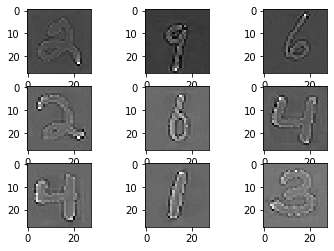

In [77]:
datagen = ImageDataGenerator(zca_whitening=True)
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	pyplot.show()
	break

### Save Augmentation to a file





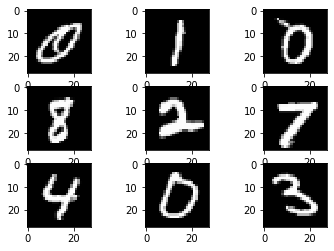

In [78]:
import os

datagen = ImageDataGenerator()
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
os.makedirs('images')
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', save_prefix='aug', save_format='png'):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break